## Group 25 
### Olof Sjögren
### Romain Theodet

# Question 1
## a)

The data was retrieved from: 
https://ourworldindata.org/grapher/life-expectancy-vs-gdp-per-capita

The plot is using the data for the year 2018 and rows containing missing values have been filtered out. The final amount of rows (countries) was 167. Compared to the 195 countries in the world we conclude the table is a reasonable representation. We use 2018 since it's the moste recent complete data available.

GDP per capita is measured in 2011 international dollars, which corrects for inflation and cross-country price differences.

NOTE: The axis denoting GDP is plot logarithmic using base 10 to account for a minority of countries with extremly high GDP, thus making the graph hard to read as a lot of the other scatter points blend together.

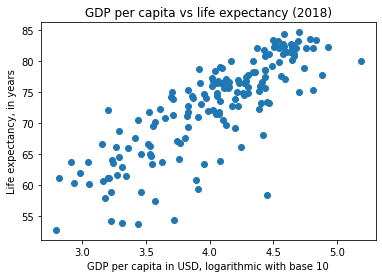

In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

entityCol = "Entity"
yearCol = "Year"
populationCol = "Population (historical estimates)"
lifeCol = "Life expectancy"
GDPCol = "GDP per capita"

table = pd.read_csv("./life-expectancy-vs-gdp-per-capita.csv")
table = table[[entityCol, yearCol, populationCol, lifeCol, GDPCol]]

# 306 "countries" at first : this include micronations, continents and other edge-cases

# Only select rows for the year 2018
is2018 = table[yearCol] == 2018
table = table[is2018]

# Remove all rows with 'nan' values, i.e. inclomplete rows
table = table.dropna()

# We can also remove the year column since we know all are for year 2018.
# We also delete the entry for the world as it is not a country.
del table[yearCol]
table = table.set_index(entityCol)
table = table.drop("World")

table[GDPCol] = np.log10(table[GDPCol])

# len(table) == 166
# There are 195 countries in the world, so while we dropped some,
# we still keep around 85% of the world

xValues = table[GDPCol]
yValues = table[lifeCol]
plt.title("GDP per capita vs life expectancy (2018)")
plt.xlabel("GDP per capita in USD, logarithmic with base 10")
plt.ylabel("Life expectancy, in years")
plt.scatter(xValues, yValues)
plt.show()


## b)
The results you can see above seems reasonable.
We can see that the GDP of each country seems correlated to its life expectancy.

A logical explaination might be that people in poor countries don't live as long as in rich countries, because of political instabilities, food and water shortage, and access to healthcare. 

## c)

We did a data cleaning, as some countries were missing some informations. First of all we removed any rows with missing entries. It probably also helped us remove data points which aren't actually countries such as continents and small city-states, since the original dataset counted 306 entities. 

We also only kept the year 2018,to keep the plot more clear and have the same temporal references.

The columns we kept are `Entity` (the country name), `Year`, `Population`, `Life expectancy` and `GDP per capita`. We removed excess columns such as `Country Code` and `Continent`.

## d)
The calculated table below shows the countries with a life expectancy higher than one standard deviation above the mean.

In [2]:
deviationLife = np.std(table[lifeCol])
meanLife = np.mean(table[lifeCol])
deviationGDP = np.std(table[GDPCol])
meanGDP = np.mean(table[GDPCol])

rowsAbove = table[ table[lifeCol] > meanLife + deviationLife ]
del rowsAbove[populationCol]

print("Countries with a life expectancy higher than one standard deviation above the mean :")
rowsAbove

Countries with a life expectancy higher than one standard deviation above the mean :


,Life expectancy,GDP per capita
Entity,,
Australia,83.281,4.697498
Austria,81.434,4.633348
Belgium,81.468,4.599405
Canada,82.315,4.651944
Cyprus,80.828,4.434320
Denmark,80.784,4.665697
Finland,81.736,4.589913
France,82.541,4.585640
Germany,81.180,4.664432


## e)
The result is based on the assumption that a high life expectancy is any life expectancy higher than average, plus a small bias, which is a quarter of a standard deviation. This bias is to filter countries just above average, to get a better sample. \
Subsequently a low GDP per capita is any GDP per capita lower than average, minus a bias.

The table below shows countries with a high life expectancy and a low GDP per capita.

In [3]:
rowsBelowAverage = table[ (table[lifeCol] > meanLife + deviationLife / 4) & (table[GDPCol] < meanGDP - deviationGDP / 4) ]
del rowsBelowAverage[populationCol]

print("Countries with a high life expectancy but a low GDP per capita :")
rowsBelowAverage


Countries with a high life expectancy but a low GDP per capita :


,Life expectancy,GDP per capita
Entity,,
Honduras,75.088,3.702571
Vietnam,75.317,3.833411


## f)
We consider a strong economy to be a country with a total GDP higher than one standard deviation above the mean.
We are searching for any of these countries which have a lower than average life expectancy.

The bias is higher than above (a full standard deviation), since an "above-average" country shouldn't count as a rich country.

In [4]:
deviationTotalGDP = np.std(table[GDPCol] * table[populationCol])
meanTotalGDP = np.mean(table[GDPCol] * table[populationCol])
rowsBelowAverage = table[ (table[lifeCol] < meanLife) & (table[GDPCol] * table[populationCol] > meanTotalGDP + deviationTotalGDP) ]

print("Countries with a low life expectancy but a high total GDP :")
rowsBelowAverage

Countries with a low life expectancy but a high total GDP :


,Population (historical estimates),Life expectancy,GDP per capita
Entity,,,
India,1.352642e+09,69.416,3.832924
Indonesia,2.676705e+08,71.509,4.073782


## g)

We used a slightly different formula as above, where the bias is now a third of a standard deviation, and with the GDP per capita instead of the total GDP.
The table below shows the countries fulfilling this criteria. We use the slightly different bias due to the distribution of the data.

We can notice that the "socially poor" countries with a high total GDP are not the same as those with a high GDP per capita.
We could explain this by seeing that the countries above have a really high population, so while the countries are rich the money doesn't really flow to the people, which explains these difference. \
The same phenomenon might explain the list below, the only difference being they don't have as many people as above.


In [5]:
rowsBelowAverage = table[ (table[lifeCol] < meanLife) & (table[GDPCol] > meanGDP + deviationGDP / 3) ]

print("Countries with a low life expectancy but a high GDP per capita :")
rowsBelowAverage

Countries with a low life expectancy but a high GDP per capita :


,Population (historical estimates),Life expectancy,GDP per capita
Entity,,,
Botswana,2254067.0,69.275,4.199814
Equatorial Guinea,1308966.0,58.402,4.455286
Gabon,2119275.0,66.187,4.245847
Russia,145734034.0,72.386,4.392150
Turkmenistan,5850902.0,68.073,4.420259


# Question 2

## a)

We have downloaded data for Corrruption and Happiness. \
Some of the questions we are going to investigate are:

* Is corruption correlated to happiness?
* How has the average GDP per capita of the world developed since 1900?
* Does happiness and life expectancy share a similiar distribution?
* Is corruption correlated to GDP?

Each visualization and the data for the visualization is discussed below. Note however that since the gathered data might differ in it's size, i.e. the tables contain data for different years, since some tables will be combined only the data for the matching years will be used. This made us lose some data point as the year is not contained in both tables however the final table was still found to be sufficiently large.


In [6]:
lifeGDPTable = table

corruptionCol = "Corruption Perception Index - Transparency International (2018)"
corruptionTable = pd.read_csv("./corruption.csv")[[entityCol, yearCol, corruptionCol]]

happinessCol = "Life satisfaction in Cantril Ladder (World Happiness Report 2021)"
happinessTable = pd.read_csv("./happiness.csv")[[entityCol, yearCol, happinessCol]]

# Only select rows for the year 2018
corruptionTable = corruptionTable[ corruptionTable[yearCol] == 2018 ].dropna()
happinessTable = happinessTable[ happinessTable[yearCol] == 2018 ].dropna()

del corruptionTable[yearCol]
del happinessTable[yearCol]
happinessTable = happinessTable.set_index(entityCol)
corruptionTable = corruptionTable.set_index(entityCol)

# Create merged tables. We create multiple tables to avoid discarding data entries in cases where it's unnecessary
corruptionHappinessTable = pd.merge(corruptionTable, happinessTable, on=entityCol)
happinessLifeTable = pd.merge(happinessTable, lifeGDPTable, on=entityCol)
corruptionGDPTable = pd.merge(corruptionTable, lifeGDPTable, on=entityCol)


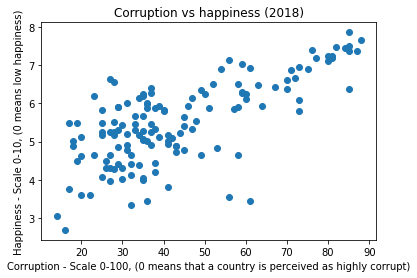

In [7]:
plt.title("Corruption vs happiness (2018)")
plt.xlabel("Corruption - Scale 0-100, (0 means that a country is perceived as highly corrupt)")
plt.ylabel("Happiness - Scale 0-10, (0 means low happiness)")
plt.scatter(corruptionHappinessTable[corruptionCol], corruptionHappinessTable[happinessCol])
plt.show()


##### Is corruption correlated to happiness?

We chose a scatter plot here, since we wanted to highlight the possible correlation between corruption and happiness. \
We filtered some countries, as some had no data about corruption and / or happiness in 2018.

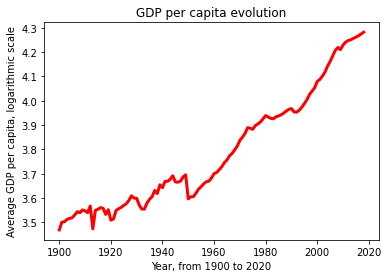

In [8]:
GDPTable = pd.read_csv("./life-expectancy-vs-gdp-per-capita.csv")[[yearCol, GDPCol]]
GDPTable = GDPTable[GDPTable[yearCol] >= 1900].dropna()
avgGDPByYear = GDPTable.groupby(yearCol).mean()

plt.title("GDP per capita evolution")
plt.xlabel("Year, from 1900 to 2020")
plt.ylabel("Average GDP per capita, logarithmic scale")
plt.plot(avgGDPByYear.index, np.log10(avgGDPByYear[GDPCol]), linewidth=3, color="red")
plt.show()


##### How has the average GDP per capita of the world developed since 1900?
A line connected plot was used here since it's a great way to visualize change over time. The data used was cleaned to only keep the data for the years after 1900 as that was chosen as an arbitray boundary. Every data point for a certain year was then averaged and stored as the average GDP per capita for that year. Once again a logarithmic scale was used to include the large range of values without compromizing the visualization. Note here that some countries might not have any data for every year since 1900 which might scew the result a bit. However these countries are not included in the calculation in the average so there is still some information to be gained from the result. Since we knew that every year only had one data point a line connected graph of all the data points will be continous and easy to understand. Thus a great visualization for the situation.

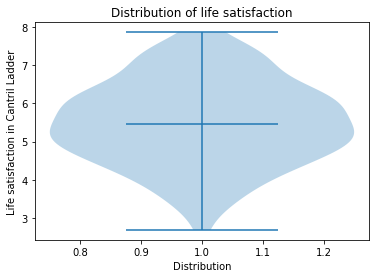

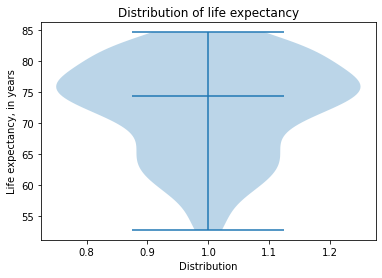

In [9]:
# Happiness and life expectancy distribution

plt.violinplot(happinessLifeTable[happinessCol], showmedians=True)
plt.title("Distribution of life satisfaction")
plt.xlabel("Distribution")
plt.ylabel("Life satisfaction in Cantril Ladder")
plt.show()

plt.violinplot(lifeGDPTable[lifeCol], showmedians=True)
plt.title("Distribution of life expectancy")
plt.xlabel("Distribution")
plt.ylabel("Life expectancy, in years")
plt.show()

##### Does happiness and life expectancy share a similiar distribution?

The best way to convey the idea of similar distribution is, obviously, to show both distribution. This is why we chose a violin graph ; the middle horizontal bar represents the median, and the blue area the distribution curve.

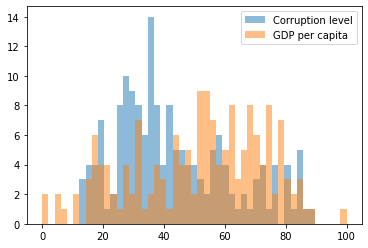

In [10]:
# Corruption and GDP

x = corruptionGDPTable[corruptionCol]

y = corruptionGDPTable[GDPCol]
y -= min(y)
y *= 100 / max(y)
# We dilate and offset the GDP per capita to compare with the corruption level between 0 and 100

bins = np.linspace(0, 100, 50)

plt.hist(x, bins, alpha=0.5, label="Corruption level")
plt.hist(y, bins, alpha=0.5, label="GDP per capita")
plt.legend(loc="upper right")
plt.show()

##### Is corruption correlated to GDP?

The histograms really highlight the repartition of GDP and corruption across the countries, showing where the spikes are. \
We had to dilate our data and add an offset, such that the spikes are clear and meaningful. Both scales start and stop at the same place.

## b)

##### Is corruption correlated to happiness?
From the graph we can see that there seems to be a correlation between happiness and corruption where happiness increases as the corruption decreases.
One should be wary of "Correlation does not mean causation"´however since we are aware of the data we are dealing with and the premise the correlation implies is logical (Less corruption implies higher happiness) there might be a connection here. Although, we are biased since we are actively looking for a pattern and might have pre-concieved ideas of what we expect to see. 
Nonetheless there might be a connection worth exploring here. 


##### How has the average GDP per capita of the world developed since 1900?
We can see the first dip between 1900 and 1920 probably representing the ecomomic effect of the first world war. We can also see the the economic effect of the second world war slightly later. Futhermore we can see the economic crisis of 2008 represented as a dip in the graph.

The interesting thing about a graph like this is that the context of history is really reflected by the graph.


##### Does happiness and life expectancy share a similiar distribution?
As we can see above, while the happiness has a distribution that almost look like a bell curve, the life expectancy one has is offset towards late death. \
We can assume that, while the life satisfaction is evenly distributed across all populations, life expectancy is not evenly balanced across the globe.


##### Is corruption correlated to GDP?
As we can see above, the corruption level hits a spike for the poorer countries, but then gets lower as the GDP increase.
Still, we can notice that the corruption level gets higher again for the top countries, the ones with a huge-scale economy. Though, GDP and corruption don't really to be correlated.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab83f1d1-4f39-4251-b899-1ad25d544179' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>